In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('1642_dataset_3min.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

In [9]:
df = pd.read_csv('1642_dataset_3min.csv') 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datetime        175200 non-null  object 
 1   house_number    175200 non-null  float64
 2   air1            175200 non-null  float64
 3   bathroom1       175200 non-null  float64
 4   car1            175200 non-null  float64
 5   clotheswasher1  175200 non-null  float64
 6   dishwasher1     175200 non-null  float64
 7   disposal1       175200 non-null  float64
 8   drye1           175200 non-null  float64
 9   dryg1           175200 non-null  float64
 10  furnace1        175200 non-null  float64
 11  grid            175200 non-null  float64
 12  kitchenapp1     175200 non-null  float64
 13  kitchenapp2     175200 non-null  float64
 14  livingroom1     175200 non-null  float64
 15  microwave1      175200 non-null  float64
 16  oven1           175200 non-null  float64
 17  refrigerat

In [3]:
data

,house_number,air1,bathroom1,car1,clotheswasher1,dishwasher1,disposal1,drye1,dryg1,furnace1,...,microwave1,oven1,refrigerator1,solar,utilityroom1,venthood1,weekend,season,holiday,Temp
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1642.0,0.001,0.004969,0.001,0.0,0.000990,2.850000e-08,0.001,0.0,0.024392,...,0.007959,0.008,0.058938,-0.005,0.0,0.0,0.0,1.0,1.0,-3.0
2018-01-01 00:03:00,1642.0,0.001,0.004963,0.001,0.0,0.000988,3.422000e-08,0.001,0.0,0.024670,...,0.007951,0.008,0.059126,-0.005,0.0,0.0,0.0,1.0,1.0,-3.0
2018-01-01 00:06:00,1642.0,0.001,0.004957,0.001,0.0,0.000986,3.994000e-08,0.001,0.0,0.024948,...,0.007942,0.008,0.059313,-0.005,0.0,0.0,0.0,1.0,1.0,-3.0
2018-01-01 00:09:00,1642.0,0.001,0.004951,0.001,0.0,0.000984,4.566000e-08,0.001,0.0,0.025227,...,0.007934,0.008,0.059501,-0.005,0.0,0.0,0.0,1.0,1.0,-3.0
2018-01-01 00:12:00,1642.0,0.001,0.004944,0.001,0.0,0.000981,5.138000e-08,0.001,0.0,0.025505,...,0.007926,0.008,0.059689,-0.005,0.0,0.0,0.0,1.0,1.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:45:00,1642.0,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,...,0.004000,0.008,0.121000,-0.008,0.0,0.0,0.0,1.0,1.0,7.0
2018-12-31 23:48:00,1642.0,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,...,0.004000,0.008,0.121000,-0.008,0.0,0.0,0.0,1.0,1.0,7.0
2018-12-31 23:51:00,1642.0,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,...,0.004000,0.008,0.121000,-0.008,0.0,0.0,0.0,1.0,1.0,7.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175200 entries, 2018-01-01 00:00:00 to 2018-12-31 23:57:00
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   air1            175200 non-null  float64
 1   bathroom1       175200 non-null  float64
 2   car1            175200 non-null  float64
 3   clotheswasher1  175200 non-null  float64
 4   dishwasher1     175200 non-null  float64
 5   disposal1       175200 non-null  float64
 6   drye1           175200 non-null  float64
 7   dryg1           175200 non-null  float64
 8   furnace1        175200 non-null  float64
 9   grid            175200 non-null  float64
 10  kitchenapp1     175200 non-null  float64
 11  kitchenapp2     175200 non-null  float64
 12  livingroom1     175200 non-null  float64
 13  microwave1      175200 non-null  float64
 14  oven1           175200 non-null  float64
 15  refrigerator1   175200 non-null  float64
 16  solar           175200

In [4]:
features = ['air1', 'bathroom1', 'car1', 'clotheswasher1', 'dishwasher1', 
            'disposal1', 'drye1', 'dryg1', 'furnace1', 'grid', 'kitchenapp1', 
            'kitchenapp2', 'livingroom1', 'microwave1', 'oven1', 'refrigerator1',
            'solar', 'utilityroom1', 'venthood1']

In [5]:
data=data[features]

In [6]:
data

,air1,bathroom1,car1,clotheswasher1,dishwasher1,disposal1,drye1,dryg1,furnace1,grid,kitchenapp1,kitchenapp2,livingroom1,microwave1,oven1,refrigerator1,solar,utilityroom1,venthood1
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.001,0.004969,0.001,0.0,0.000990,2.850000e-08,0.001,0.0,0.024392,0.4310,0.003959,0.180134,0.03,0.007959,0.008,0.058938,-0.005,0.0,0.0
2018-01-01 00:03:00,0.001,0.004963,0.001,0.0,0.000988,3.422000e-08,0.001,0.0,0.024670,0.4658,0.003951,0.179761,0.03,0.007951,0.008,0.059126,-0.005,0.0,0.0
2018-01-01 00:06:00,0.001,0.004957,0.001,0.0,0.000986,3.994000e-08,0.001,0.0,0.024948,0.5006,0.003942,0.179388,0.03,0.007942,0.008,0.059313,-0.005,0.0,0.0
2018-01-01 00:09:00,0.001,0.004951,0.001,0.0,0.000984,4.566000e-08,0.001,0.0,0.025227,0.5354,0.003934,0.179014,0.03,0.007934,0.008,0.059501,-0.005,0.0,0.0
2018-01-01 00:12:00,0.001,0.004944,0.001,0.0,0.000981,5.138000e-08,0.001,0.0,0.025505,0.5702,0.003926,0.178641,0.03,0.007926,0.008,0.059689,-0.005,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:45:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0
2018-12-31 23:48:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0
2018-12-31 23:51:00,0.001,0.002000,0.001,0.0,0.000000,9.999710e-04,0.000,0.0,0.078000,0.5870,-0.001000,0.001000,0.03,0.004000,0.008,0.121000,-0.008,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175200 entries, 2018-01-01 00:00:00 to 2018-12-31 23:57:00
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   air1            175200 non-null  float64
 1   bathroom1       175200 non-null  float64
 2   car1            175200 non-null  float64
 3   clotheswasher1  175200 non-null  float64
 4   dishwasher1     175200 non-null  float64
 5   disposal1       175200 non-null  float64
 6   drye1           175200 non-null  float64
 7   dryg1           175200 non-null  float64
 8   furnace1        175200 non-null  float64
 9   grid            175200 non-null  float64
 10  kitchenapp1     175200 non-null  float64
 11  kitchenapp2     175200 non-null  float64
 12  livingroom1     175200 non-null  float64
 13  microwave1      175200 non-null  float64
 14  oven1           175200 non-null  float64
 15  refrigerator1   175200 non-null  float64
 16  solar           175200

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
def create_sequences(data, time_steps=48):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [ ]:
time_steps = 48 
X, y = create_sequences(data_scaled, time_steps)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(X.shape[2])
])



C:\Users\Abhiraj kumar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 185s 41ms/step - loss: 0.0111 - mae: 0.0662 - val_loss: 9.2640e-04 - val_mae: 0.0159
Epoch 2/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 178s 41ms/step - loss: 0.0022 - mae: 0.0294 - val_loss: 7.6027e-04 - val_mae: 0.0157
Epoch 3/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 177s 40ms/step - loss: 0.0020 - mae: 0.0285 - val_loss: 6.7911e-04 - val_mae: 0.0149
Epoch 4/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 168s 38ms/step - loss: 0.0020 - mae: 0.0280 - val_loss: 6.7067e-04 - val_mae: 0.0143
Epoch 5/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 161s 37ms/step - loss: 0.0019 - mae: 0.0276 - val_loss: 5.4780e-04 - val_mae: 0.0138
Epoch 6/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 165s 38ms/step - loss: 0.0019 - mae: 0.0273 - val_loss: 6.8654e-04 - val_mae: 0.0143
Epoch 7/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 162s 37ms/step - loss: 0.0019 - mae: 0.0271 - val_loss: 5.7805e-04 - val_mae: 0.0132
Epoch 8/20
4379/4379 ━━━━━━━━━━━━━━━━━━━━ 155s 35ms/step - loss: 0.0018 - mae: 0.0267 - val_loss: 6.9794e-04 - 

In [15]:
y_pred = model.predict(X_test)

1095/1095 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
results = []


4379/4379 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step


In [25]:
for i, col in enumerate(features):
    train_mae = mean_absolute_error(y_train[:, i], Y_train_pred[:, i])
    train_mse = mean_squared_error(y_train[:, i], Y_train_pred[:, i])
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train[:, i], Y_train_pred[:, i])

    test_mae = mean_absolute_error(y_test[:, i], Y_test_pred[:, i])
    test_mse = mean_squared_error(y_test[:, i], Y_test_pred[:, i])
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test[:, i], Y_test_pred[:, i])

    overfit = "Yes" if (train_rmse - test_rmse) > (0.3 * train_rmse) else "No"

    results.append([col, train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2, overfit])

df_results = pd.DataFrame(results, columns=["Column", "Train MAE", "Test MAE", "Train RMSE", "Test RMSE", "Train R²", "Test R²", "Overfitting?"])
print(df_results)

            Column  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  \
0             air1   0.014040  0.008455    0.020737   0.013069  0.993110   
1        bathroom1   0.004417  0.004166    0.015791   0.018221  0.824849   
2             car1   0.012494  0.011496    0.022288   0.025841  0.990812   
3   clotheswasher1   0.007376  0.006869    0.019092   0.017629  0.968932   
4      dishwasher1   0.007587  0.007611    0.017170   0.018230  0.972143   
5        disposal1   0.012797  0.061679    0.016077   0.064975  0.995151   
6            drye1   0.014442  0.015425    0.019794   0.020068  0.969003   
7            dryg1   0.004757  0.004384    0.017714   0.017792  0.657806   
8         furnace1   0.016642  0.020401    0.022007   0.024443  0.992791   
9             grid   0.009951  0.008743    0.014677   0.014115  0.987778   
10     kitchenapp1   0.007723  0.007992    0.018822   0.019751  0.748517   
11     kitchenapp2   0.004304  0.004006    0.017829   0.013419  0.744725   
12     livin

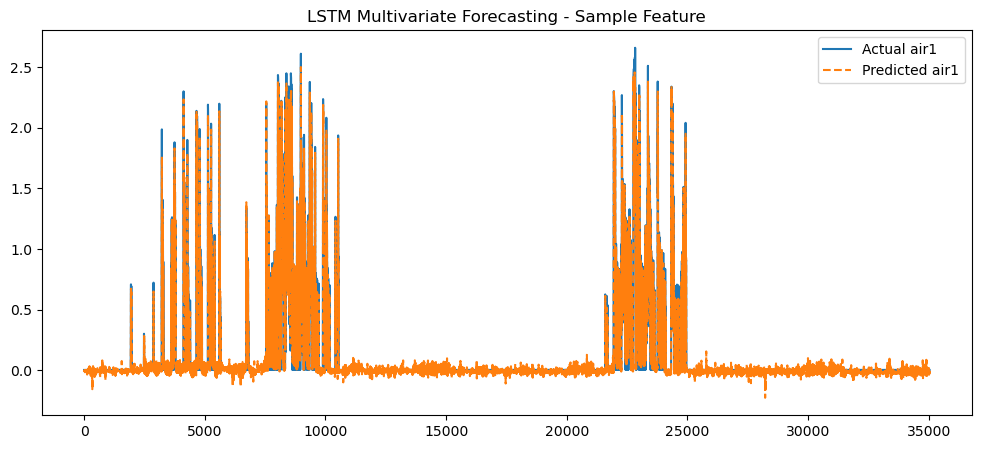

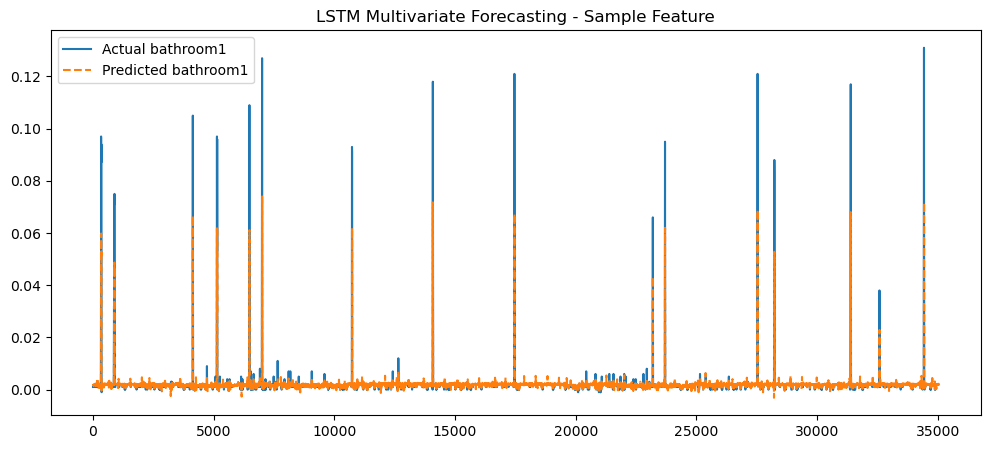

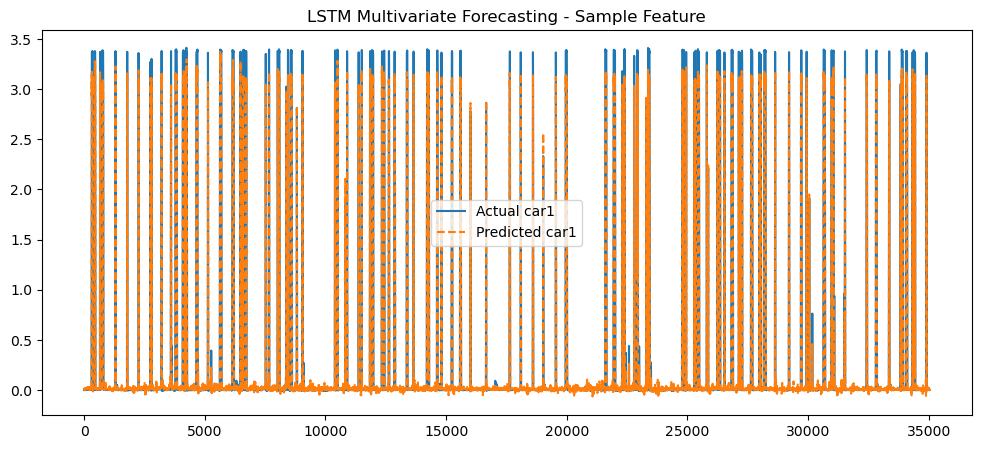

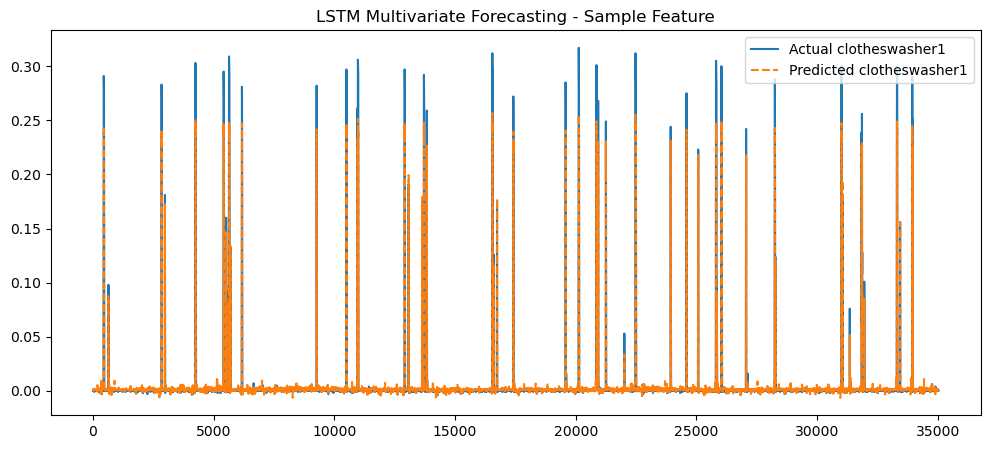

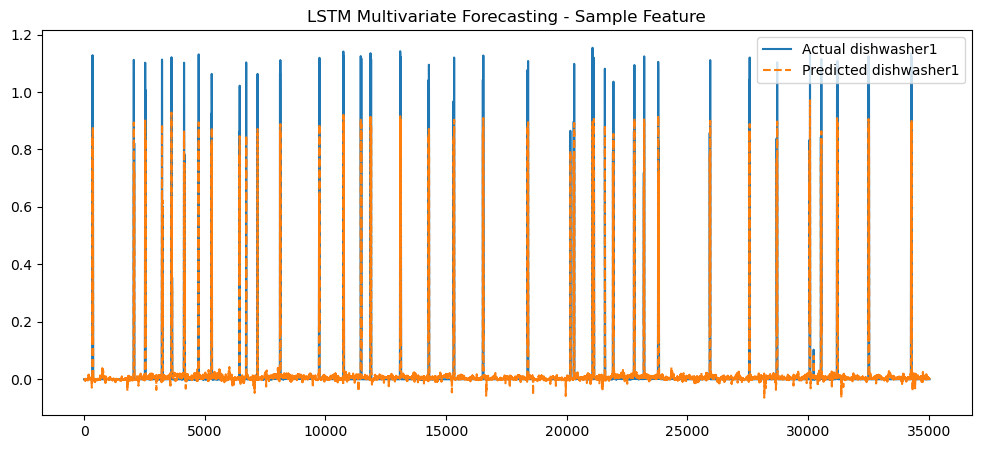

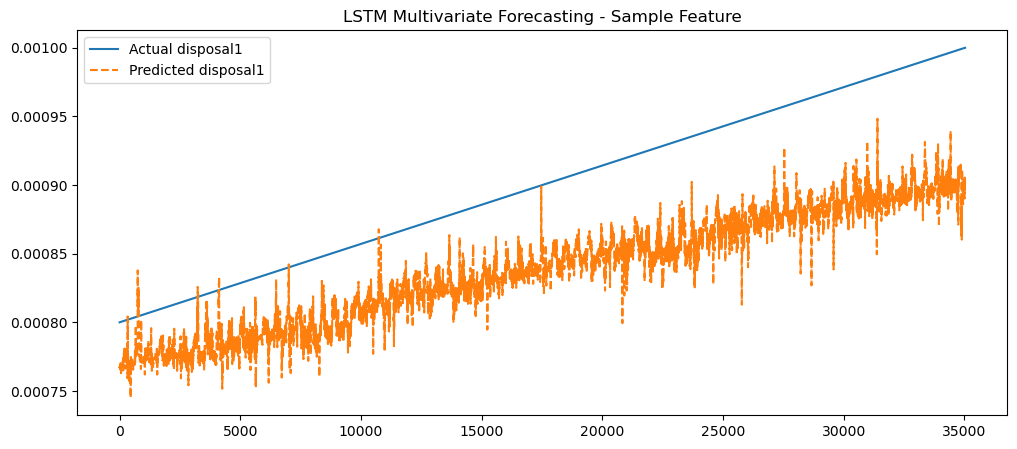

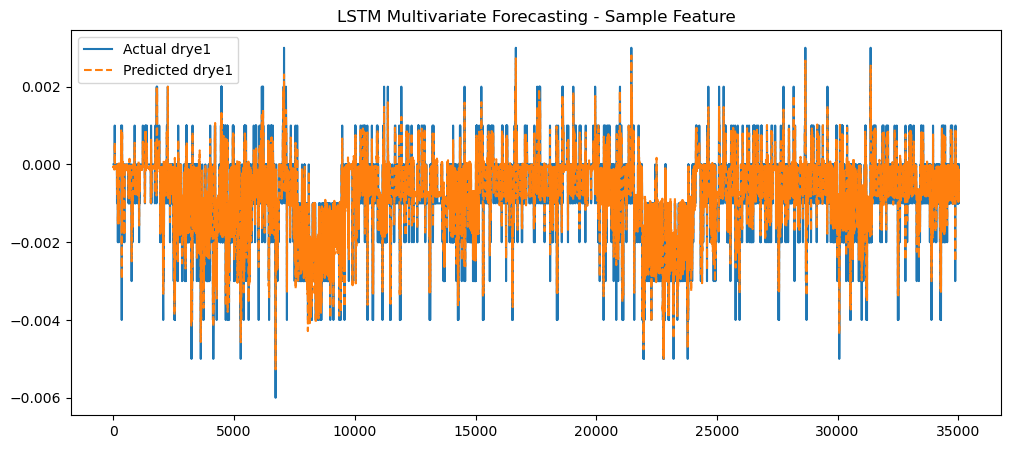

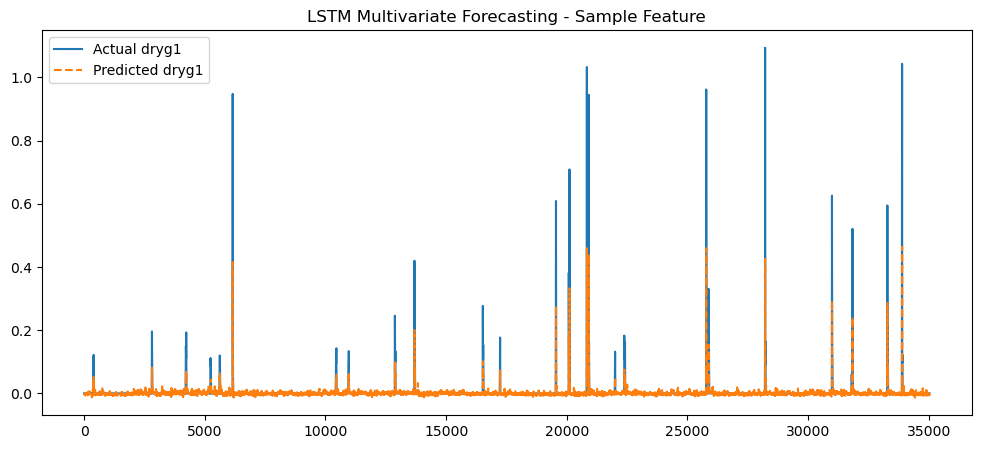

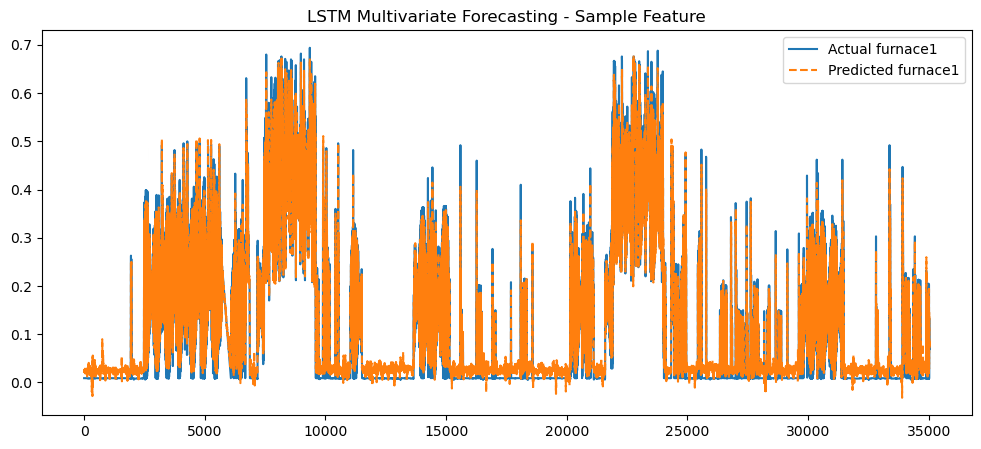

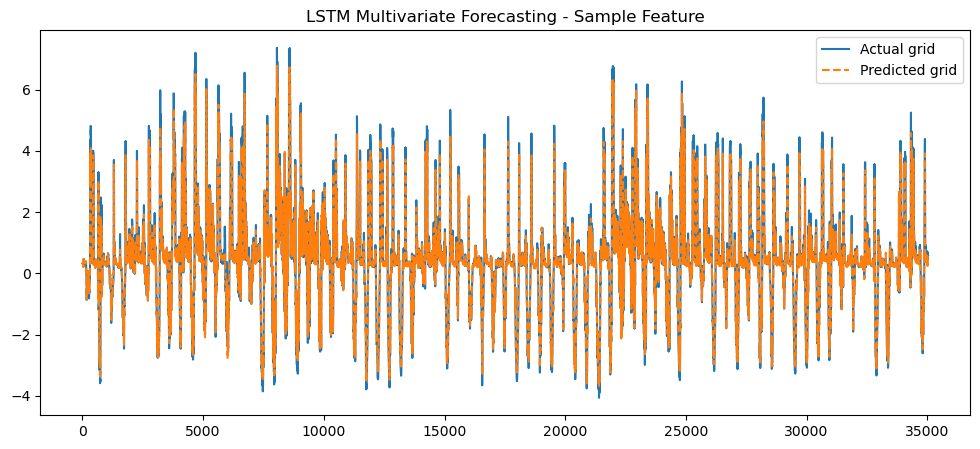

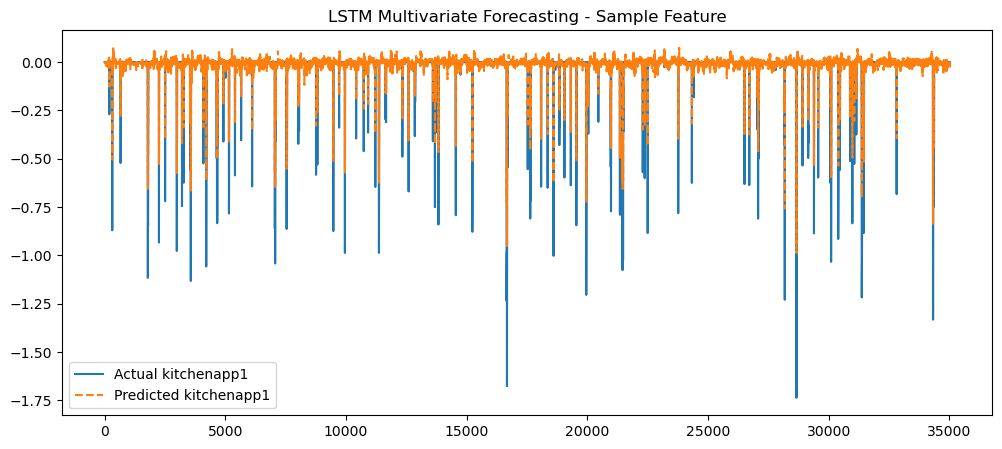

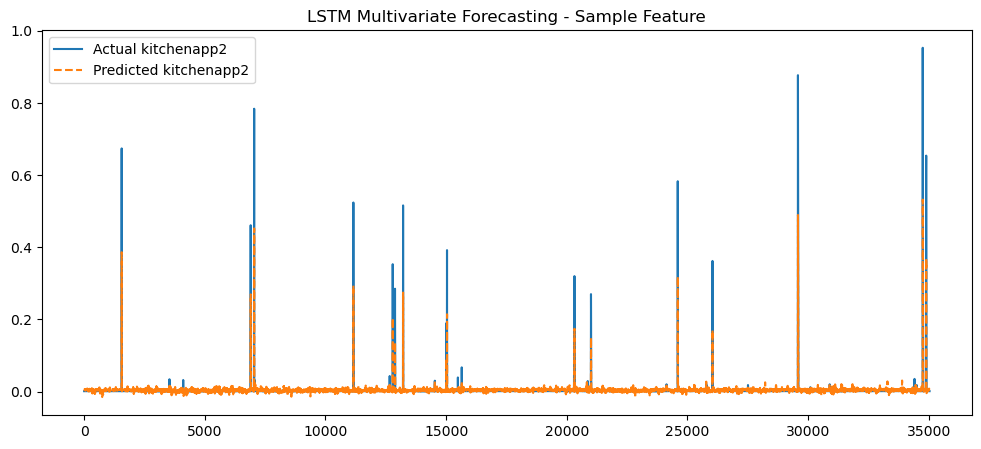

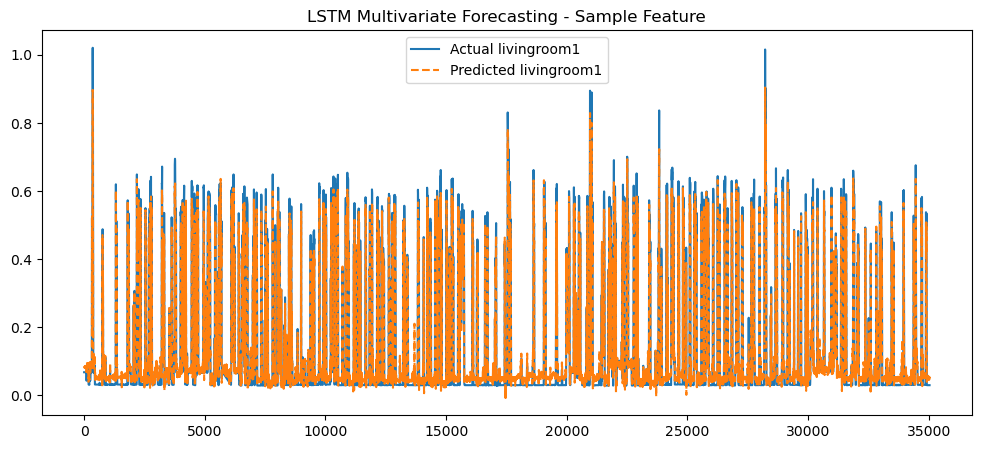

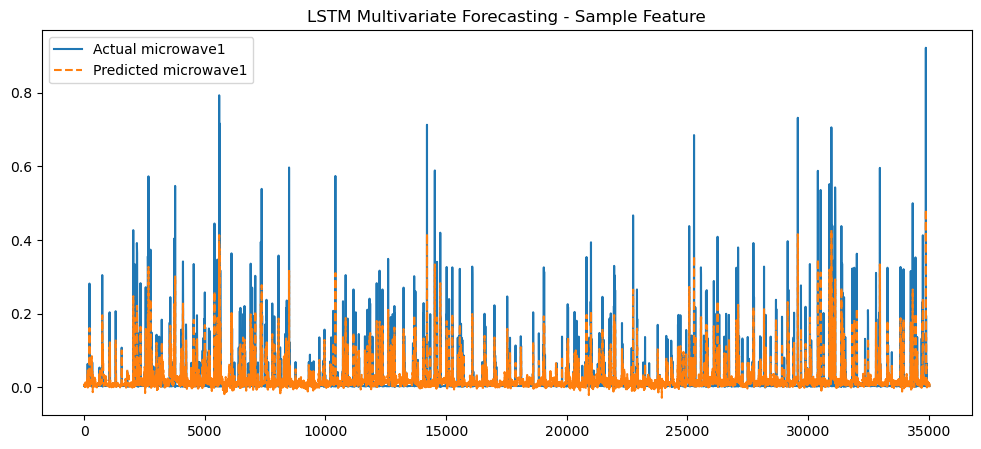

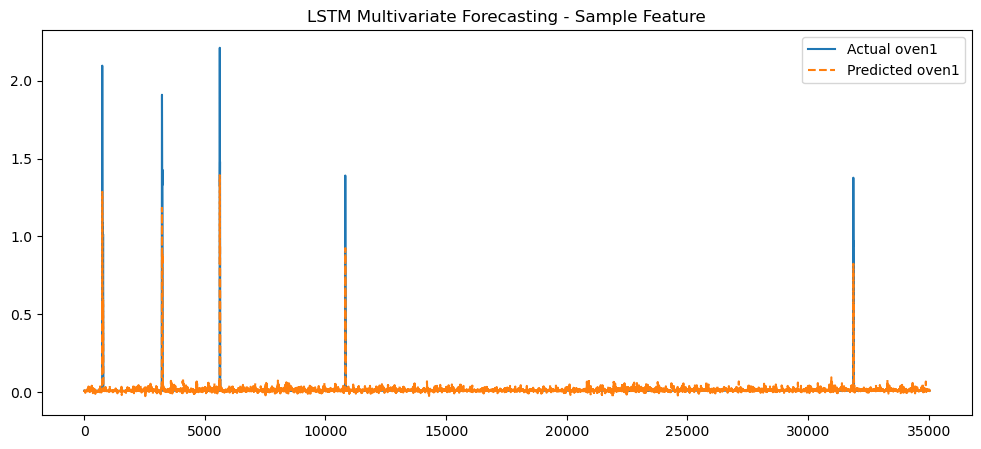

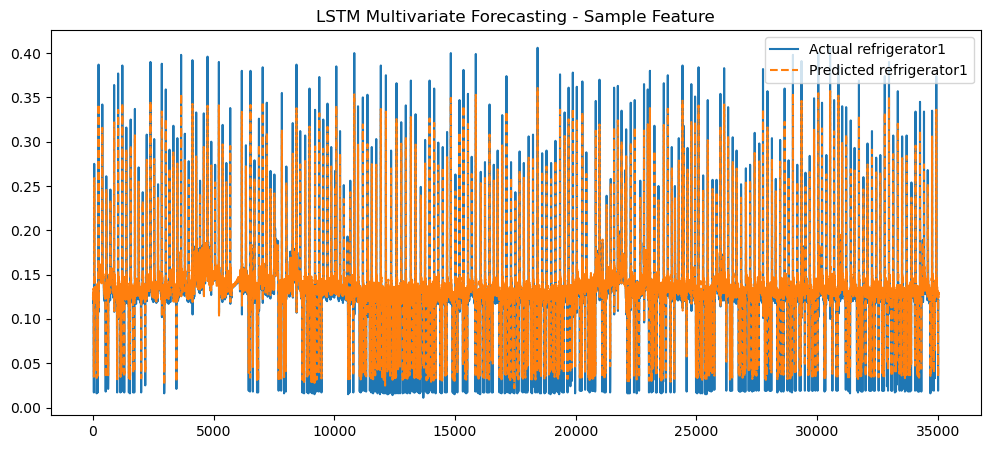

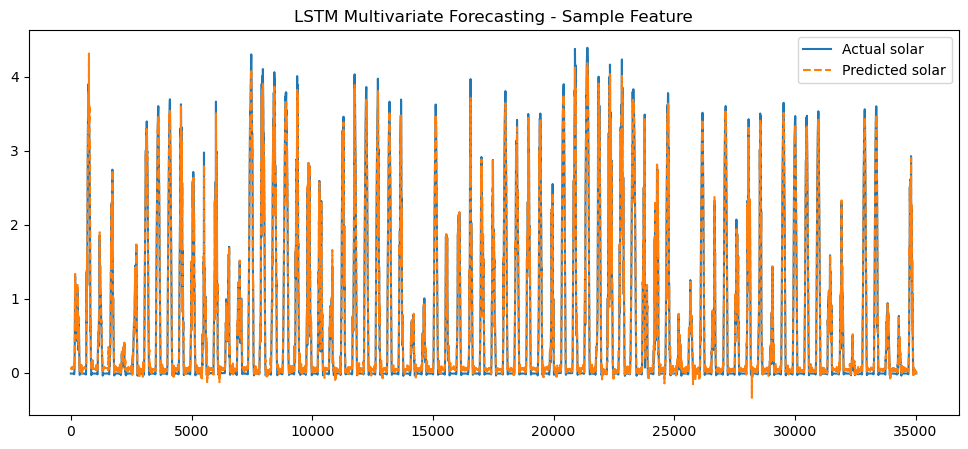

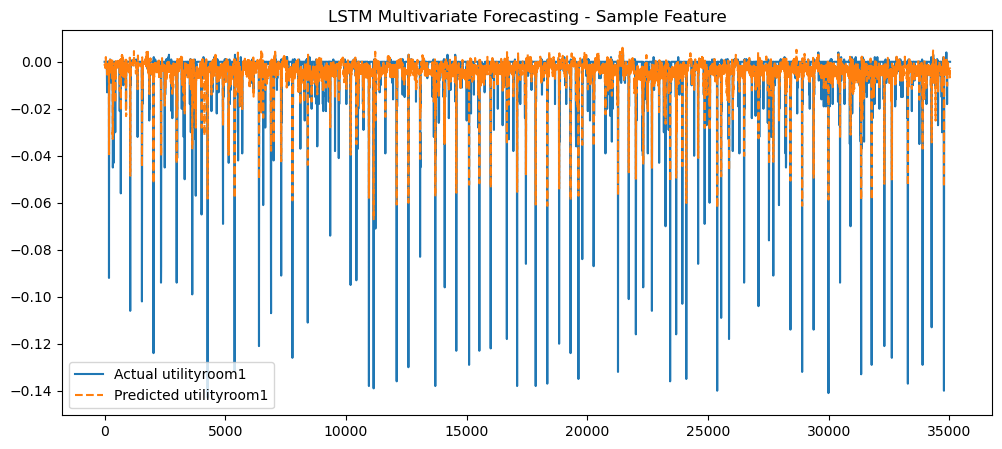

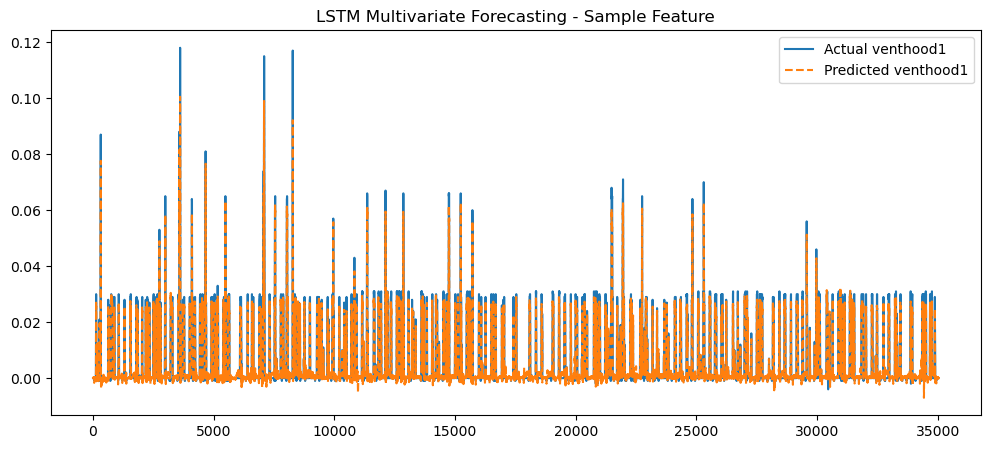

In [26]:
for i in range(len(features)):
   plt.figure(figsize=(12, 5))
   plt.plot(y_test_inv[:, i], label=f'Actual {features[i]}')
   plt.plot(y_pred_inv[:, i], label=f'Predicted {features[i]}', linestyle='dashed')
   plt.legend()
   plt.title('LSTM Multivariate Forecasting - Sample Feature')
   plt.show()
